Train Data Overview:
   StudyInstanceUID SeriesInstanceUID SOPInstanceUID  pe_present_on_image  \
0     6897fa9de148      2bfbb7fd2e8b   c0f3cb036d06                    0   
1     6897fa9de148      2bfbb7fd2e8b   f57ffd3883b6                    0   
2     6897fa9de148      2bfbb7fd2e8b   41220fda34a3                    0   
3     6897fa9de148      2bfbb7fd2e8b   13b685b4b14f                    0   
4     6897fa9de148      2bfbb7fd2e8b   be0b7524ffb4                    0   

   negative_exam_for_pe  qa_motion  qa_contrast  flow_artifact  \
0                     0          0            0              0   
1                     0          0            0              0   
2                     0          0            0              0   
3                     0          0            0              0   
4                     0          0            0              0   

   rv_lv_ratio_gte_1  rv_lv_ratio_lt_1  leftsided_pe  chronic_pe  \
0                  0                 1             1    

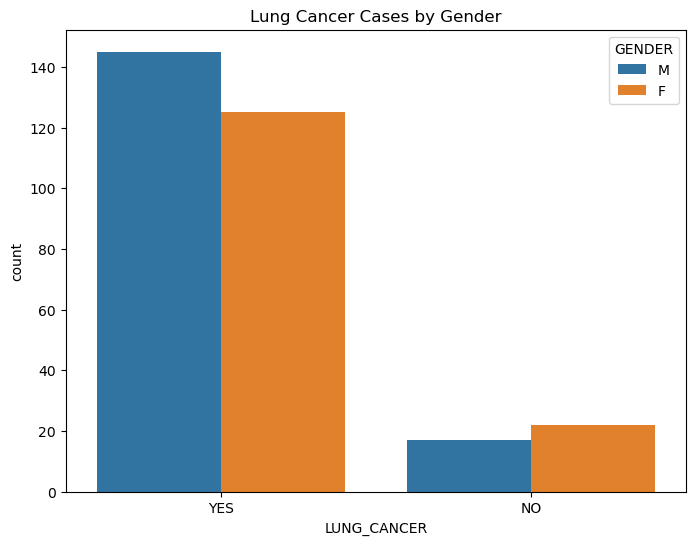


Missing Values:
 GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_21784\118530061.py:24: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  survey_data.fillna(survey_data.mean(), inplace=True)


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load CSV data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
survey_data = pd.read_csv('survey_lung_cancer.csv')

# Explore data
print("Train Data Overview:\n", train_data.head())
print("\nSurvey Data Overview:\n", survey_data.head())

# Visualize some relationships (EDA)
plt.figure(figsize=(8, 6))
sns.countplot(data=survey_data, x='LUNG_CANCER', hue='GENDER')
plt.title('Lung Cancer Cases by Gender')
plt.show()

# Check for missing values
print("\nMissing Values:\n", survey_data.isnull().sum())

# Fill or drop missing values if needed
survey_data.fillna(survey_data.mean(), inplace=True)


In [8]:
import os
import pandas as pd
from PIL import Image
import numpy as np

# Define paths
image_folder = './colon_image_sets/colon_n'
csv_file = 'colon_n.csv'

# Initialize an empty list to store image data
data = []

# Iterate through the image folder
for file_name in os.listdir(image_folder):
    if file_name.endswith(('jpg', 'jpeg', 'png')):  # Add other formats if needed
        file_path = os.path.join(image_folder, file_name)
        
        # Load the image
        img = Image.open(file_path).convert('L')  # Convert to grayscale
        img_resized = img.resize((28, 28))  # Resize to 28x28 pixels for consistency
        
        # Convert image to a NumPy array
        pixel_values = np.array(img_resized).flatten()  # Flatten to 1D
        
        # Extract label from the file name (e.g., 'cat_001.jpg' -> 'cat')
        label = file_name.split('_')[0]
        
        # Append the data as a list
        data.append([label, *pixel_values])

# Create a DataFrame
columns = ['label'] + [f'pixel_{i}' for i in range(28 * 28)]
df = pd.DataFrame(data, columns=columns)

# Save to CSV
df.to_csv(csv_file, index=False)
print(f"CSV file saved to {csv_file}")


In [10]:
import pandas as pd

# Load the datasets
dataset1 = pd.read_csv('lung_aca.csv')
dataset2 = pd.read_csv('colon_aca.csv')
dataset3 = pd.read_csv('colon_n.csv')

# Concatenate datasets
concatenated_dataset = pd.concat([dataset1, dataset2, dataset3])

# Save the concatenated dataset to a new CSV
concatenated_dataset.to_csv('lung_cancer.csv', index=False)

print("Datasets concatenated and saved as 'lung_cancer.csv'")


Datasets concatenated and saved as 'lung_cancer.csv'


In [19]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load the dataset
data = pd.read_csv("lung_cancer.csv")

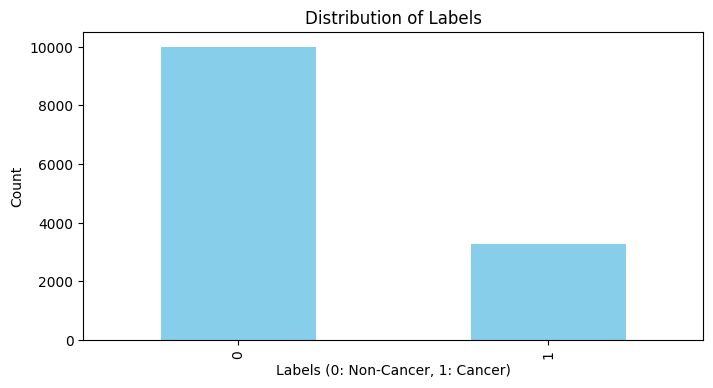

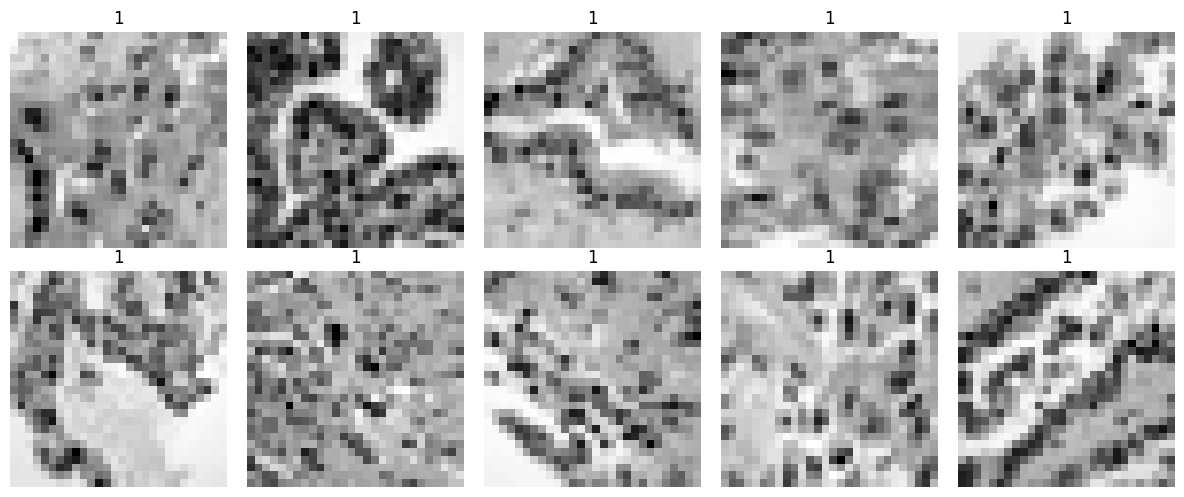

In [20]:
# 1. EDA: Analyze the distribution of labels and pixel intensities
# Extract labels and pixel data
labels = data['label']
pixels = data.drop('label', axis=1)

# Binary labels: Map filenames to binary classes (1 for cancer, 0 for non-cancer)
binary_labels = labels.str.contains("lungaca").astype(int)

# Checking the distribution of labels
label_distribution = binary_labels.value_counts()

# Visualize label distribution
plt.figure(figsize=(8, 4))
label_distribution.plot(kind='bar', color='skyblue')
plt.title("Distribution of Labels")
plt.xlabel("Labels (0: Non-Cancer, 1: Cancer)")
plt.ylabel("Count")
plt.show()

# Reshape and visualize some sample images
def plot_images(samples, labels, rows=2, cols=5):
    fig, axes = plt.subplots(rows, cols, figsize=(12, 5))
    axes = axes.flatten()
    for img, ax, label in zip(samples, axes, labels):
        ax.imshow(img, cmap='gray')
        ax.axis('off')
        ax.set_title(label)
    plt.tight_layout()
    plt.show()

# Convert data to numpy array and reshape to 28x28 for visualization
pixel_data = pixels.values.reshape(-1, 28, 28)
sample_images = pixel_data[:10]
sample_labels = binary_labels[:10]

# Visualize the first 10 images
plot_images(sample_images, sample_labels)

# Normalize the pixel data for model training (scale between 0 and 1)
pixel_data_normalized = pixel_data / 255.0

# Split the data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(
    pixel_data_normalized, binary_labels, test_size=0.2, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42
)  # 20% of train becomes validation

# Reshape for TensorFlow input (28x28x1)
X_train = X_train[..., np.newaxis]
X_val = X_val[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [21]:
# 2. Build the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
# 3. Train the Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32
)


Epoch 1/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9801 - loss: 0.0557 - val_accuracy: 0.9883 - val_loss: 0.0298
Epoch 2/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9841 - loss: 0.0451 - val_accuracy: 0.9894 - val_loss: 0.0326
Epoch 3/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9842 - loss: 0.0449 - val_accuracy: 0.9763 - val_loss: 0.0574
Epoch 4/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9845 - loss: 0.0397 - val_accuracy: 0.9868 - val_loss: 0.0392
Epoch 5/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9878 - loss: 0.0287 - val_accuracy: 0.9781 - val_loss: 0.0594
Epoch 6/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9860 - loss: 0.0328 - val_accuracy: 0.9902 - val_loss: 0.0200
Epoch 7/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9898 - loss: 0.0265 - val_accuracy: 0.9955 - val_loss: 0.0147
Epoch 8/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9925 - loss: 0.0219 - val_accu

In [25]:
# 4. Evaluate the Model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9985 - loss: 0.0072
Test Accuracy: 1.00


83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1996
           1       0.99      1.00      0.99       659

    accuracy                           1.00      2655
   macro avg       1.00      1.00      1.00      2655
weighted avg       1.00      1.00      1.00      2655



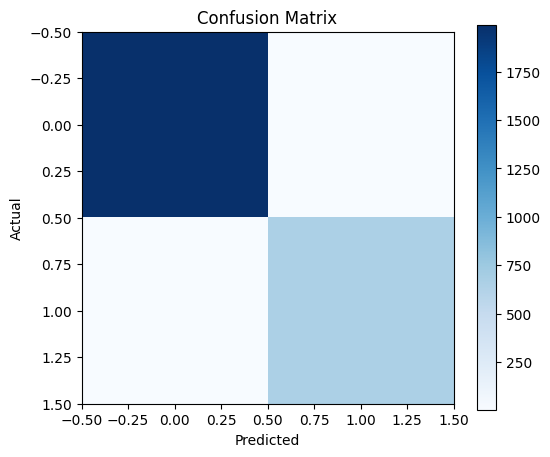

In [26]:
# 5. Classification Report and Confusion Matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
plt.imshow(conf_matrix, cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Save the model for future use
model.save("lung_cancer_cnn_model.h5")